### Feature Engineering and Data Processing 2022-03
This file is for R&D of features for the model. Features should be created using functions that can then be cut and paste into the model_functions.py file to be imported into the final model .ipynb file.

In [2]:
# Import 3rd party libraries
import os
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

# Configure Notebook
%matplotlib inline
plt.style.use('dark_background')
#plt.style.use('ggplot')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

#### Import the data (LTS data + intersections, neighbourhoods ...)

epsg:4326
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 59554 entries, 0 to 59553
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    59554 non-null  int64   
 1   GEO_ID      59554 non-null  int64   
 2   LFN_ID      59554 non-null  int64   
 3   LF_NAME     59554 non-null  object  
 4   FNODE       59554 non-null  int64   
 5   TNODE       59554 non-null  int64   
 6   ONE_WAY_DI  59554 non-null  int64   
 7   length_in_  59554 non-null  float64 
 8   GEO_ID_1    59554 non-null  int64   
 9   LTS         59554 non-null  int64   
 10  Shape_Leng  59554 non-null  float64 
 11  geometry    59554 non-null  geometry
dtypes: float64(2), geometry(1), int64(8), object(1)
memory usage: 5.5+ MB
None


<AxesSubplot:>

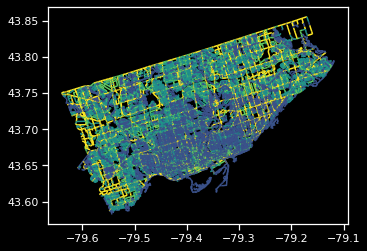

In [3]:
# import Bo's shapefile
lts_gpd = gpd.read_file('C:/Users/Keagan Rankin/Documents/PycharmProj/data/raw_data/Bo Github Data/centerline_LTS_July2021.shp')

# View 
print(lts_gpd.crs)
print(lts_gpd.info())
lts_gpd.plot(column='LTS')

In [4]:
# Import the intersection data
intersections = pd.read_csv('C:/Users/Keagan Rankin/Documents/PycharmProj/data/raw_data/traffic-signal-vehicle-and-pedestrian-volumes-data.csv')
print(intersections.info())
intersections.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TCS #                        2280 non-null   int64  
 1    Main                        2280 non-null   object 
 2    Midblock Route              175 non-null    object 
 3    Side 1 Route                2280 non-null   object 
 4    Side 2 Route                758 non-null    object 
 5   Activation Date              2280 non-null   object 
 6   Latitude                     2280 non-null   float64
 7   Longitude                    2280 non-null   float64
 8   Count Date                   2280 non-null   object 
 9   8 Peak Hr Vehicle Volume     2280 non-null   int64  
 10  8 Peak Hr Pedestrian Volume  2280 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 196.1+ KB
None


,TCS #,Main,Midblock Route,Side 1 Route,Side 2 Route,Activation Date,Latitude,Longitude,Count Date,8 Peak Hr Vehicle Volume,8 Peak Hr Pedestrian Volume
0,2,JARVIS ST,NaN,FRONT ST E,NaN,11/15/1948,43.649418,-79.371446,06-21-2017,15662,13535
1,3,KING ST E,NaN,JARVIS ST,NaN,08/23/1950,43.650461,-79.371924,09-17-2016,12960,7333
2,4,JARVIS ST,NaN,ADELAIDE ST E,NaN,09/12/1958,43.651534,-79.372360,11-08-2016,17770,7083
3,5,JARVIS ST,NaN,RICHMOND ST E,NaN,04/21/1962,43.652718,-79.372824,12-08-2015,19678,4369
4,6,JARVIS ST,NaN,QUEEN ST E,NaN,08/24/1928,43.653704,-79.373238,09-17-2016,14487,3368


#### Data Processing

Create a function that drops outliers...